#### The data set has COVID-19 fictional data from 3 planets: Tatooine, Naboo and Alderaan
For each Planet there is information for: Daily Cases, Recoveries and Deaths in this order for 4 cities

The dataset is created as lists below since file handling is not yet covered. Normally this sort of data is read into python from one or multiple files

The objective of this excercise is to teach you slicing, aggregating, plotting data in a numpy array


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
# Tatooine Data (Planet 1)
tatooine_data = [
    # City 1
    [100, 80, 5],
    # City 2
    [120, 90, 4],
    #City 3
    [110, 85, 6],
    # City 4
    [115, 88, 3],
]

# Naboo Data (Planet 2)
naboo_data = [
    [90, 70, 4], 
    [110, 85, 3], 
    [100, 80, 5], 
    [95, 75, 2]
]


# Alderaan Data (Planet 3)
alderaan_data = [
    [85, 65, 3], 
    [105, 80, 2], 
    [95, 75, 4], 
    [90, 70, 1]
]

In [3]:
my3Darray = np.array([tatooine_data , naboo_data , alderaan_data])
print(my3Darray)

the_shape_is = (3,4,3)
"""The shape (3,4,3) means we have 3 stacks, each comparising of 4 rows and 3 columns. 
The stacks makes the array 3 dimensional and the 4 rows in each stack is making the matrix 2 dimensional"""

[[[100  80   5]
  [120  90   4]
  [110  85   6]
  [115  88   3]]

 [[ 90  70   4]
  [110  85   3]
  [100  80   5]
  [ 95  75   2]]

 [[ 85  65   3]
  [105  80   2]
  [ 95  75   4]
  [ 90  70   1]]]


'The shape (3,4,3) means we have 3 stacks, each comparising of 4 rows and 3 columns. \nThe stacks makes the array 3 dimensional and the 4 rows in each stack is making the matrix 2 dimensional'

In [4]:
#add the data of all three planets here into a single array. it should be in the order tatooine, naboo, alderaan
all_data = [tatooine_data , naboo_data , alderaan_data]
print(all_data)

# Display the shape of the 3D array to confirm

print("The shape of np_array_3d is:",my3Darray.shape)


[[[100, 80, 5], [120, 90, 4], [110, 85, 6], [115, 88, 3]], [[90, 70, 4], [110, 85, 3], [100, 80, 5], [95, 75, 2]], [[85, 65, 3], [105, 80, 2], [95, 75, 4], [90, 70, 1]]]
The shape of np_array_3d is: (3, 4, 3)


### Can you find out the planet with the highest number of deaths?

First, let us make an array of deathtolls. This array should be a 2-D array:
- Each row represents one planet. 
- Each row will have 4 values(columns), one for the deathtoll of each city
- Scroll up to the definition and see where exactly the number of deaths are stored. It is COLUMN at index 2 in each planet's data
- __Extract this deathtoll column for each planet from the all_data array. You will have to use indexing for 3-D arrays here__ 

The indexing for tatooine has already been done for you: all_data[0, :, 2]. Tatooine data is index 0 in the outermost dimension, then we need all rows so we use : and the column index is 2. [5 marks]

In [5]:
death_data = np.array(my3Darray[:,:,2]) 
print(death_data)

print("\n")

print(death_data.shape)

[[5 4 6 3]
 [4 3 5 2]
 [3 2 4 1]]


(3, 4)


Now, using the death_data array and the aggregate function np.sum, sum up the deathtoll of each planet. Remember that each row in death_data represents a planet. Use the axis argument here inside np.sum <br>

note: summing death_data along rows using np.sum will automatically return a numpy array of rowsums. You don't need to create an array using np.array [5 marks]

In [6]:
# Summing the deaths for each planet

total_deaths_per_planet = np.sum(death_data , axis = 1)
print(total_deaths_per_planet)

[18 14 10]


First, simply find the highest death toll using np.max [5 marks]

In [7]:
most_deaths = np.max(total_deaths_per_planet) 

print("Highest number of deaths:", most_deaths)

Highest number of deaths: 18


To just get the max no of deaths, you used the np.max function. But now, we don't just need the maximum number, we need the POSITION of that max as well in order to be able to tell which planet it corresponds to (recall that we compiled our data in the order tatooine, naboo and alderaan) 

- Instead of just max, we also need the INDEX of the max. For this, google the np.argmax() function
- Once you have the index of the max, fetch the name from the list planet_names using that index

[5 marks]

In [8]:
planet_names = ["Tatooine", "Naboo", "Alderaan"]

index_of_most_deaths = np.argmax(most_deaths)
print(index_of_most_deaths)

planet_with_most_deaths = planet_names[index_of_most_deaths]

print("Planet with the most deaths:", planet_with_most_deaths)

0
Planet with the most deaths: Tatooine


Remember that our death_data array has the death data for all the cities for every planet. We have 12 cities in total. Use the death_data array to calculate the average deaths per city. [5 marks]

In [9]:
# Calculating the average deaths per city
average_deaths_per_city = np.mean(death_data)

print("Average deaths per city:", average_deaths_per_city)


Average deaths per city: 3.5


Now, create a bar chart of number of cases for each city on Tatooine.

__Extract this data from the all_data array__. You will have to use 3d array indexing and remember that the data for tatooine is the data at index 0 in the outermost dimension of the all_data 3D array. Then from this, you need to extract the column for number of cases for all tatooine cities. [5 marks]

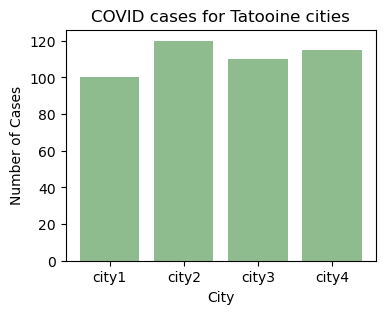

In [59]:
# Assuming np_array_3d is the 3D array you have created

# Extracting the cases data for each city on Tatooine
x_values = ["city1", "city2", "city3", "city4"]
cases_tatooine = my3Darray[0, :, 0] #essentially column 0 from the tatooine array inside all_data


# Creating the bar chart of x_values against cases_tatooine. add your arguments below:
plt.figure(figsize=(4,3))
plt.bar(x_values,cases_tatooine , color = 'darkseagreen')
plt.title('COVID cases for Tatooine cities')
plt.xlabel('City')
plt.ylabel('Number of Cases')
plt.show()

Now try creating sub plots for each planet. Extract the cases data for each planet from the all_data array. x_values will be the same for each planet. [10 marks]

(0.0, 130.0)

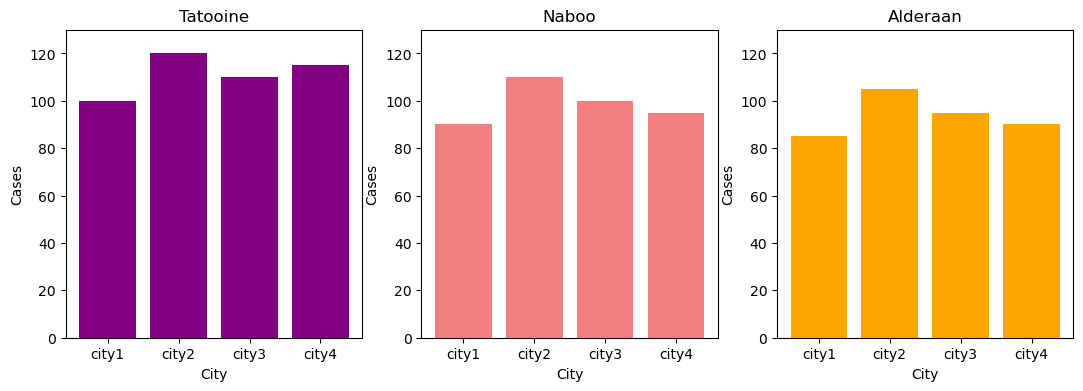

In [52]:
# Creating a figure with 3 subplots
fig, axes = plt.subplots( 1,3,figsize = (13,4))  # add arguments to make subplots with 1 row, 3 columns

x_values = ["city1", "city2", "city3", "city4"]

cases_tatooine = my3Darray[0, :, 0]
cases_naboo = my3Darray[1, :, 0]
cases_alderaan = my3Darray[2, :, 0]

mylist = [max(cases_tatooine),max(cases_naboo),max(cases_alderaan)]

# for tatooine
axes[0].bar(x_values,cases_tatooine , color = 'Purple')
axes[0].set_title('Tatooine')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Cases')
axes[0].set_ylim(0,max(mylist)+10) #use the same ylim for each subplot so that all the y_axes are consistent across subplots


# for naboo
axes[1].bar(x_values,cases_naboo , color = 'lightcoral')
axes[1].set_title('Naboo')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Cases')
axes[1].set_ylim(0,max(mylist)+10)

# for alderaan
axes[2].bar(x_values,cases_alderaan , color = 'Orange')
axes[2].set_title('Alderaan')
axes[2].set_xlabel('City')
axes[2].set_ylabel('Cases')
axes[2].set_ylim(0,max(mylist)+10)

Please make scatter plot with X axis showing GDP per capita, Y axis showing life expectancy and the area of the bubble showing the size of population

Please pay attention to:
1. How to set bubble size based on parameter
2. How to label the individual bubbles with the country names

You can try googling or chat gpt if you are still unsure get in touch with TAs or the instructor [15 marks]

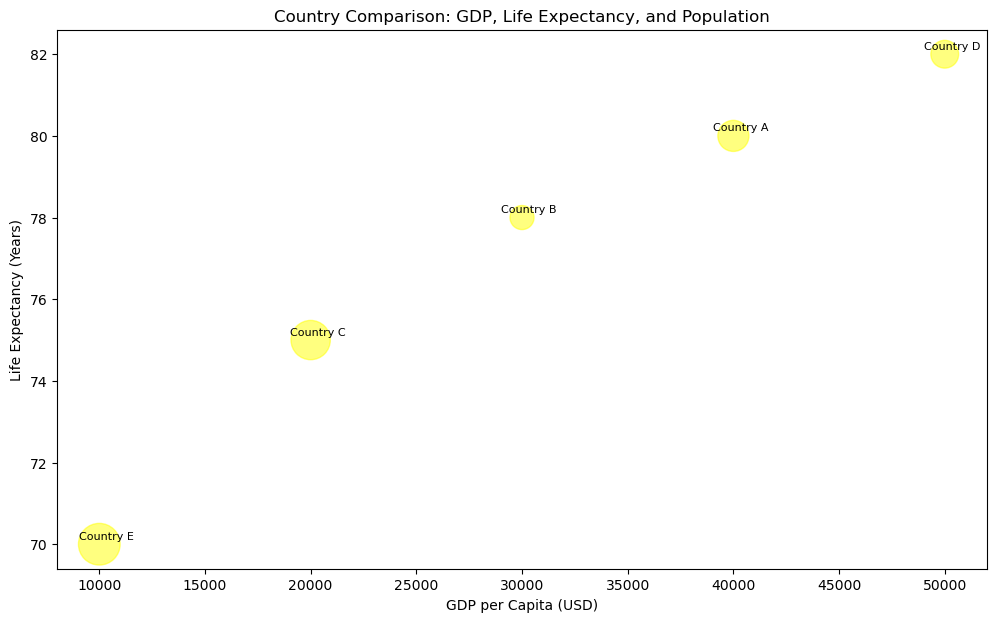

In [56]:
import matplotlib.pyplot as plt

# Example data
countries = ['Country A', 'Country B', 'Country C', 'Country D', 'Country E']
gdp_per_capita = [40000, 30000, 20000, 50000, 10000]  # in USD
life_expectancy = [80, 78, 75, 82, 70]  # in years
population = [50, 30, 80, 40, 90]  # in millions

# Bubble size - scaled to make the sizes reasonable for the plot
# You may need to adjust the scaling factor depending on your data
bubble_size = [pop * 10 for pop in population]

# Creating the scatter plot
plt.figure(figsize=(12, 7))
scatter = plt.scatter(gdp_per_capita, life_expectancy, s=bubble_size, c='yellow' , alpha=0.5)

# Adding labels and title
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.title('Country Comparison: GDP, Life Expectancy, and Population')


# Annotating each bubble with the country names
for i, country in enumerate(countries):
    plt.annotate(country, (gdp_per_capita[i],life_expectancy[i]), textcoords="offset pixels", xytext=(7,5), ha='center', fontsize = 8)

# Showing the plot
plt.show()

### RegEx

Please make a regular expression to find all RGB Hex Codes in a blurb of text. Google the format of RGB Hex Code and make your rules and then build out the expression [10 marks]

In [1]:
import regex as re

test_text = """In this design, the primary colors are #FF5733, #33FF57, and #3357FF.
               Make sure to also consider darker shades like #0A0A0A and lighter tones such as #FAFAFA.
               Invalid codes like #12345, #XYZ123, and #A1B2G3 should not be matched."""

student_regex = '#(?:[A-F0-9]{3}){1,2}'

# Find all matches
matches = re.findall(student_regex , test_text) #add your arguments here 

# Displaying the matches
for match in matches:
    print(match)


#FF5733
#33FF57
#3357FF
#0A0A0A
#FAFAFA
#123
#A1B


__Recall capturing and non capturing groups when you do this question:__

We want to extract time from the log_text without the AM/PM. However, we need to add regex code for AM/PM in our pattern so that when we pick up digits like 09:45, we know it is being followed by a space and then AM/PM to know for sure that the digits we picked are in fact time and not something else (like duration for example).  

In the extracted match list, we just want the time without AM/PM, for e.g. the answer should be 09:45 and not 09:45 AM. But we still need to detect for AM/PM. Here, it would serve us well to put part of our pattern that we want into a capturing group and the part we don't want to see but still need to detect in a non-capturing group. [5 marks]

In [5]:
log_text = """Error reported at 09:45 PM, system failure. Warning issued at 05:30 AM, low battery.
              Duration of failure 00:30 s. Maintenance required at 11:15 AM, disk space full 25:32."""

pattern = '(\d{2}:\d{2}) (?:AM|PM)'
matches = re.findall(pattern, log_text)

for match in matches:
    print(match)

09:45
05:30
11:15


Let us make a function that checks a string and returns True if the string has ONLY uppercase and lowercase alphabets, digits and spaces. If the string contains even a single character other than these, it returns False. 

Approach:
- Construct a regex to detect a character other than uppercase and lowercase alphabets, digits and spaces
- Use re.search to look for such a character inside your string. Recall that re.search stops after first match. You only need to use re.search for this instead of re.findall or re.finditer because you just need to detect a single disallowed character instead of detecting all of them.
- Store the result from re.search inside a variable. If this variable is empty, our search did not find any disallowed character. If this variable contains a match, our search found a disallowed character. 
- You can apply the bool function to this variable like bool(variable). If the variable is empty, bool will give False. If it contains a match, it will give True. 
- Now your function needs to return the OPPOSITE or NEGATION of this boolean value i.e. True when search comes up empty and False when search finds a match to a disallowed character. 

[10 marks]

In [6]:
def string_check(string):
    
    pattern = r'[^a-zA-Z0-9 ]'
    match = re.search(pattern , string) #add arguments here
    match_bool = bool(match) #add code to change match into boolean
    
    return not match_bool #add your return here

In [7]:
print(string_check("I got a total of 80 marks in my Math exam"))
print(string_check("I scored 88% on my exam"))
print(string_check("I got a total of 80 marks in my exam."))

True
False
False


Our string here contains some messed up websites.
- Detect all of these websites. 
- Put the part after the intial https:// in a separate group.
- in each iteration over find_iter, print the whole match as well as the separate group after the :// part. 

for example, if the website is 

"httpss://www.example88.com"

you need to print the following:

httpss://www.example88.com <br>
www.example88.com

[10 marks]

In [8]:
string = """
<html>
  <a href="https://www.example.com">Visit Example</a>dsaf
  <a href="httpss://www.example88.com">Visit Example</a>
  <a href="http://www.test-subjects.com">Test Website</a>
  <a href="httpp://www.ghost_website.edu">Test Website</a>
</html>
"""

pattern = r'https://([^" ]+)' 

matches = re.finditer(pattern , string) #add arguments here


for match in matches:
    print(match.group(0)) #add code to print whole match
    print(match.group(1)) #add code to print first group
    print("\n") #this is just to print a newline after each iteration

https://www.example.com
www.example.com


